# Yaw Optimization

See https://github.com/NREL/floris/blob/main/examples/optimization/scipy/controls_optimization/optimize_yaw.py

Written by Christopher J. Bay

Nicholas Hamilton
nicholas.hamilton@nrel.gov

2021-02-03

In [1]:
### system-level libs
import os, sys

### analysis libs
import numpy as np

### plotting libs
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import seaborn as sns

### Floris
import floris.tools as ft
from floris.tools.optimization.scipy.yaw import YawOptimization


## initialize Floris
Same setup as in the `example_input.json`, but with 5 turbines aligned axially.

In [2]:
fi = ft.floris_interface.FlorisInterface('combination_test_input.json')

## Modify layout

In [3]:
# Set turbine locations to 3 turbines in a row
D = fi.floris.farm.turbines[0].rotor_diameter
layout_x = [0, 7 * D, 14 * D]
layout_y = [0, 0, 0]
fi.reinitialize_flow_field(layout_array=(layout_x, layout_y))
fi.calculate_wake()

# Initial power output
power_initial = fi.get_farm_power()

## Optimize yaw for maximum power production

In [4]:
# =============================================================================
print("Finding optimal yaw angles in FLORIS...")
# =============================================================================
# Set bounds for allowable wake steering
min_yaw = 0.0
max_yaw = 25.0

# Instantiate the Optimization object
yaw_opt = YawOptimization(fi, minimum_yaw_angle=min_yaw, maximum_yaw_angle=max_yaw)

# Perform optimization
yaw_angles = yaw_opt.optimize()

print("==========================================")
print("yaw angles = ")
for i in range(len(yaw_angles)):
    print("Turbine ", i, "=", yaw_angles[i], " deg")

# Assign yaw angles to turbines and calculate wake
fi.calculate_wake(yaw_angles=yaw_angles)
power_opt = fi.get_farm_power()

print("==========================================")
print(
    "Total Power Gain = %.1f%%" % (100.0 * (power_opt - power_initial) / power_initial)
)
print("==========================================")

Finding optimal yaw angles in FLORIS...
Optimizing wake redirection control...
Number of parameters to optimize =  3
yaw angles = 
Turbine  0 = 25.0  deg
Turbine  1 = 25.0  deg
Turbine  2 = 0.0  deg
Total Power Gain = 16.3%


## Visualize

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


Plotting the FLORIS flowfield with yaw...


Text(0.5, 1.0, 'Optimal Wake Steering for U = 8 m/s, Wind Direction = 270$^\\circ$')

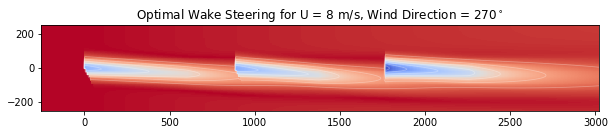

In [5]:
# =============================================================================
print("Plotting the FLORIS flowfield with yaw...")
# =============================================================================

# Initialize the horizontal cut
hor_plane = fi.get_hor_plane(x_resolution=400, y_resolution=100)

# Plot and show
fig, ax = plt.subplots(figsize=(10,4))
ft.visualization.visualize_cut_plane(hor_plane, ax=ax)
ax.set_title("Optimal Wake Steering for U = 8 m/s, Wind Direction = 270$^\circ$")
